In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [9]:
inputs = {}
outputs = {}

base = "../initial_data"  # current folder

for i in range(1, 9):
    folder = f"{base}/function_{i}"
    inputs[i] = np.load(f"{folder}/initial_inputs.npy")
    outputs[i] = np.load(f"{folder}/initial_outputs.npy")

    print(f"\nFunction {i}:")
    print("Inputs shape:", inputs[i].shape)
    print("Outputs shape:", outputs[i].shape)
    print("First 5 inputs:\n", inputs[i][:5])
    print("First 5 outputs:\n", outputs[i][:5])


Function 1:
Inputs shape: (10, 2)
Outputs shape: (10,)
First 5 inputs:
 [[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]]
First 5 outputs:
 [ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003]

Function 2:
Inputs shape: (10, 2)
Outputs shape: (10,)
First 5 inputs:
 [[0.66579958 0.12396913]
 [0.87779099 0.7786275 ]
 [0.14269907 0.34900513]
 [0.84527543 0.71112027]
 [0.45464714 0.29045518]]
First 5 outputs:
 [ 0.53899612  0.42058624 -0.06562362  0.29399291  0.21496451]

Function 3:
Inputs shape: (15, 3)
Outputs shape: (15,)
First 5 inputs:
 [[0.17152521 0.34391687 0.2487372 ]
 [0.24211446 0.64407427 0.27243281]
 [0.53490572 0.39850092 0.17338873]
 [0.49258141 0.61159319 0.34017639]
 [0.13462167 0.21991724 0.45820622]]
First 5 outputs:
 [-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758]

Function 4:
Inputs shape: (30, 4)
Outputs shape: (30,)
First 5 inputs:
 [[0.89698


=== Function 1 | Dim = 2 ===


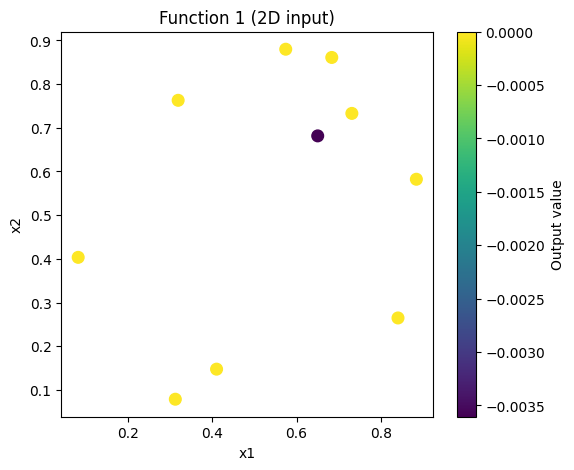


=== Function 2 | Dim = 2 ===


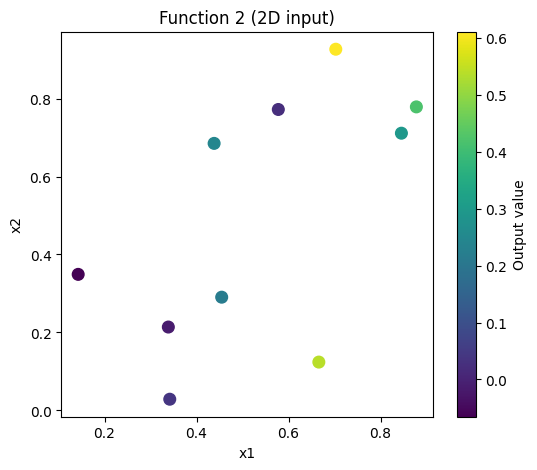


=== Function 3 | Dim = 3 ===


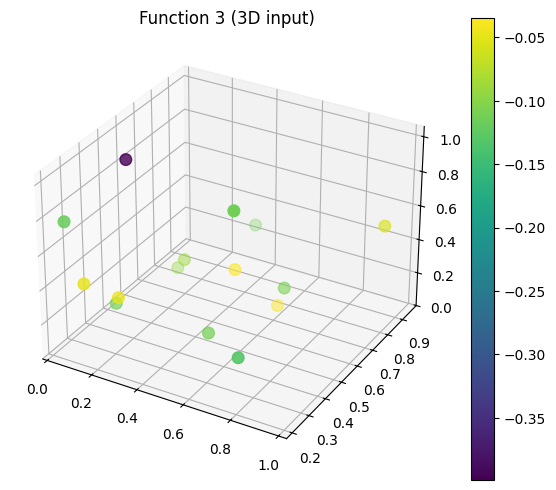


=== Function 4 | Dim = 4 ===


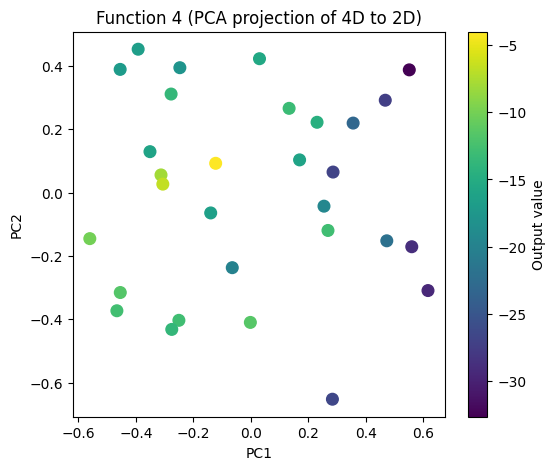


=== Function 5 | Dim = 4 ===


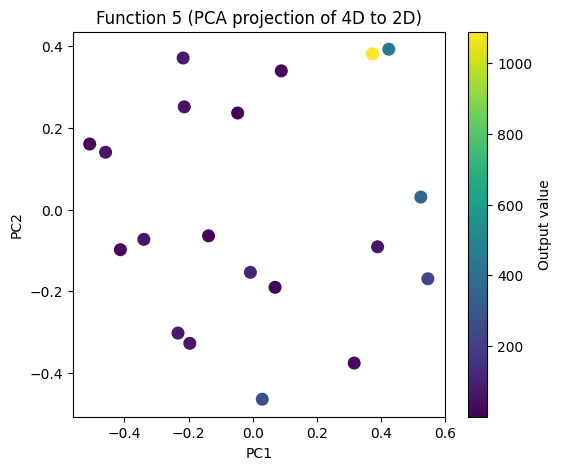


=== Function 6 | Dim = 5 ===


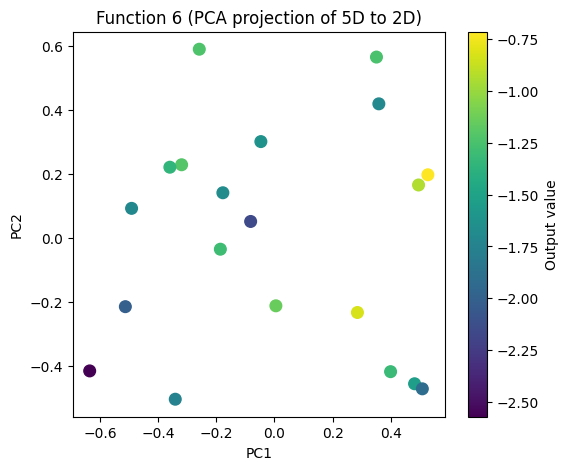


=== Function 7 | Dim = 6 ===


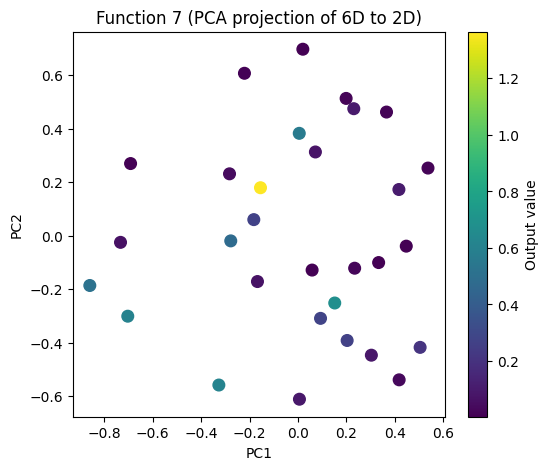


=== Function 8 | Dim = 8 ===


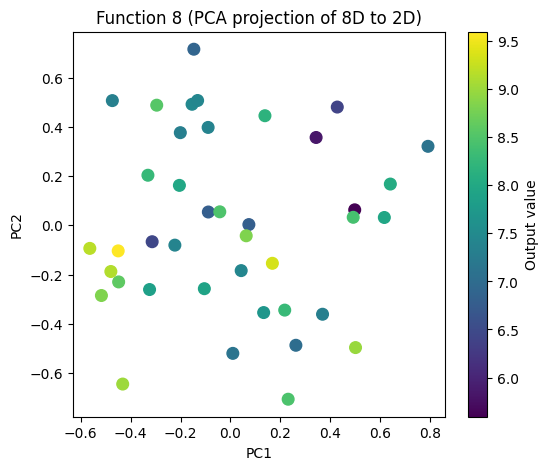

In [10]:
def plot_function(i, X, y):
    dim = X.shape[1]
    print(f"\n=== Function {i} | Dim = {dim} ===")

    if dim == 2:
        # ---- 2D Scatter plot ----
        plt.figure(figsize=(6,5))
        plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=70)
        plt.colorbar(label="Output value")
        plt.title(f"Function {i} (2D input)")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()

    elif dim == 3:
        # ---- 3D Scatter plot ----
        fig = plt.figure(figsize=(7,6))
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="viridis", s=70)
        fig.colorbar(p)
        ax.set_title(f"Function {i} (3D input)")
        plt.show()

    else:
        # ---- PCA visualisation ----
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        plt.figure(figsize=(6,5))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=70)
        plt.colorbar(label="Output value")
        plt.title(f"Function {i} (PCA projection of {dim}D to 2D)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()


# ---- Run for all functions ----
for i in range(1, 9):
    plot_function(i, inputs[i], outputs[i])

In [11]:
for i in range(1, 9):
    f_out = outputs[i]
    f_in = inputs[i]

    best_idx = np.argmax(f_out)  # works even if values are negative
    print(f"Function {i}:")
    print("Best output:", f_out[best_idx])
    print("Best input:", f_in[best_idx])
    print()

Function 1:
Best output: 7.710875114502849e-16
Best input: [0.73102363 0.73299988]

Function 2:
Best output: 0.6112052157614438
Best input: [0.70263656 0.9265642 ]

Function 3:
Best output: -0.034835313350078584
Best input: [0.49258141 0.61159319 0.34017639]

Function 4:
Best output: -4.025542281908162
Best input: [0.57776561 0.42877174 0.42582587 0.24900741]

Function 5:
Best output: 1088.8596181962705
Best input: [0.22418902 0.84648049 0.87948418 0.87851568]

Function 6:
Best output: -0.7142649478202404
Best input: [0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]

Function 7:
Best output: 1.3649683044991994
Best input: [0.05789554 0.49167222 0.24742222 0.21811844 0.42042833 0.73096984]

Function 8:
Best output: 9.598482002566342
Best input: [0.05644741 0.06595555 0.02292868 0.03878647 0.40393544 0.80105533
 0.48830701 0.89308498]



### Function 1 (2D)

Outputs are extremely close to zero (≈ 1e-16 to −3e-3).

Indicates a very narrow peak that has not been sampled yet.

No obvious pattern or gradient direction.
Conclusion: Use exploration. The landscape is under-sampled and the current data gives no strong signal for exploitation.

### Function 2 (2D)

Output range: −0.06 to 0.611.

A single clear best point exists: 0.611 at [0.7026, 0.9266].

PCA projection shows two bright areas, but numerical values confirm that one is significantly better.
Conclusion: Use exploitation near the best point, since the maximum is well-defined.

### Function 3 (3D)

All outputs negative (≈ −0.11 to −0.035).

Best point: −0.035 at [0.4926, 0.6116, 0.3402].

Noisy and slightly curved surface; improvement likely near best point.
Conclusion: Use local exploitation, sampling near the least negative region.

### Function 4 (4D)

Outputs from −32 to −4.

Best point: −4.03 at [0.5778, 0.4288, 0.4258, 0.2490].

PCA shows a scattered landscape with one clearly better region.
Conclusion: Use exploitation around the best identified region.

### Function 5 (4D)

Very wide output range (≈ 0 to 1088).

Best point by far: 1088 at [0.2242, 0.8465, 0.8795, 0.8785].

Strong indication of a dominant peak.
Conclusion: Strong exploitation — refine around the very high-yield region.

### Function 6 (5D)

Outputs from −2.5 to −0.71.

Best point: −0.71 at [0.7282, 0.1547, 0.7326, 0.6940, 0.0564].

PCA suggests moderate structure; local improvements seem likely.
Conclusion: Use exploitation near best point.

### Function 7 (6D)

Outputs from 0.02 to 1.365.

Best point: [0.0579, 0.4917, 0.2474, 0.2181, 0.4204, 0.7310].

PCA visually misleading, but numeric check confirms a clear maximum.
Conclusion: Use exploitation around the best-known point.

### Function 8 (8D)

Outputs tightly clustered around 7.0–9.6.

Best point: 9.598 at [0.0564, 0.0660, 0.0229, 0.0388, 0.4039, 0.8011, 0.4883, 0.8931].

Landscape appears structured with one dominant region.
Conclusion: Use exploitation — refine around the high-performing region.